(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
- İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
- 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
- IMDB puanı en yüksek olan ilk 10 film hangileridir?
- IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
- IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
- 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
- Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
- Hangi yılın toplam "runtime" süresi en fazladır?
- Her bir dilin en fazla kullanıldığı "Genre" nedir?
- Veri setinde outlier veri var mıdır? Açıklayınız.


In [1]:
import matplotlib.pyplot as plt
import datetime
from collections import OrderedDict
import numpy as np
import pandas as pd

In [2]:
# encoding changed to ISO-8859-1 because utf-8 is not reading.
netflix_dataframe = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
netflix_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
netflix_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
netflix_dataframe["Premiere"] = pd.to_datetime(netflix_dataframe["Premiere"]).dt.date

In [5]:
# to check if Premiere changed to datetime
netflix_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
# to see column names
netflix_dataframe.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [7]:
# long films are categorized as minimum 40 minutes.
long_films_dataframe = netflix_dataframe[netflix_dataframe["Runtime"] >= 40]
long_films_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


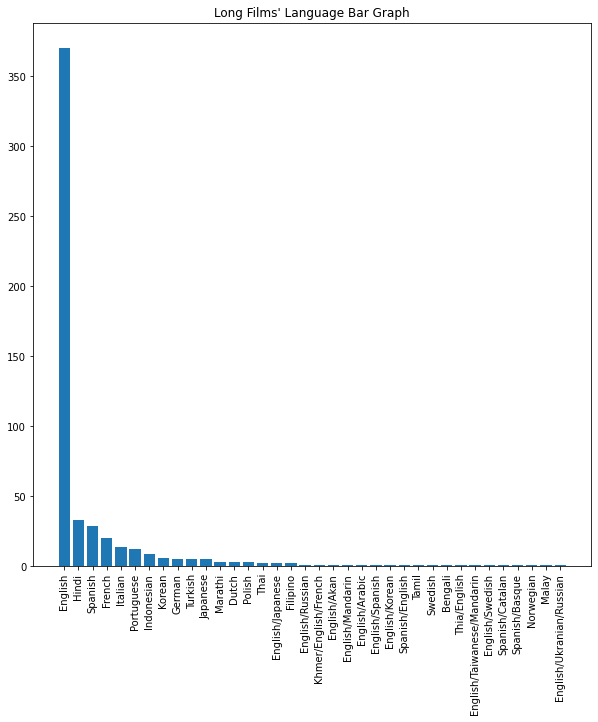

In [8]:
long_film_language_dictionary = dict(long_films_dataframe["Language"].value_counts())
fig = plt.figure(figsize=(10,10))
plt.bar(list(long_film_language_dictionary.keys()), list(long_film_language_dictionary.values()))
plt.title("Long Films' Language Bar Graph")
plt.xticks(rotation=90)
plt.show()

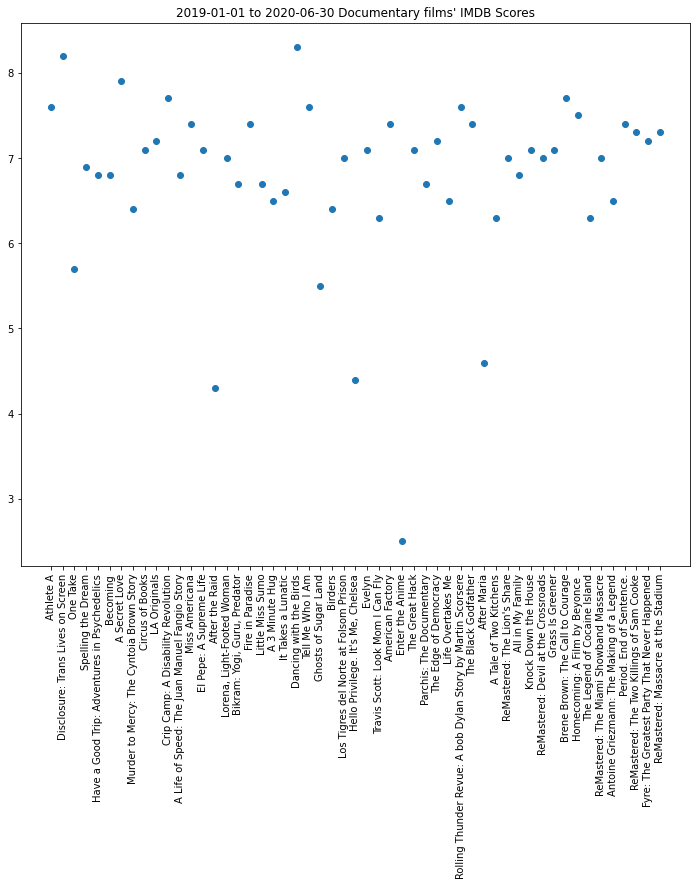

In [9]:
documentary_2019_2020_dataframe = netflix_dataframe[netflix_dataframe["Genre"] == "Documentary"]
first_date = datetime.date(2019,1,1)
second_date = datetime.date(2020,6,30)
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]>= first_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]<= second_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe.sort_values("Premiere", ascending=False, ignore_index=True)

fig = plt.figure(figsize=(12,10))
plt.scatter(documentary_2019_2020_dataframe["Title"], documentary_2019_2020_dataframe["IMDB Score"])
plt.title("2019-01-01 to 2020-06-30 Documentary films' IMDB Scores")
plt.xticks(rotation=90)
plt.show()


In [10]:
only_english_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "English"]
genres_list = list(dict(only_english_dataframe["Genre"].value_counts()).keys())
mean_list = []
for i in genres_list:
    mean_list.append(only_english_dataframe[only_english_dataframe["Genre"]==i]["IMDB Score"].mean())
highest_genre = genres_list[mean_list.index(max(mean_list))]
print(f"Highest Only English Film Genre is {highest_genre}")

Highest Only English Film Genre is Animation/Christmas/Comedy/Adventure


In [11]:
only_hindi_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "Hindi"]
average_runtime_hindi = only_hindi_dataframe["Runtime"].mean()
print(f"Average Hindi Films Runtime is {average_runtime_hindi}")

Average Hindi Films Runtime is 115.78787878787878


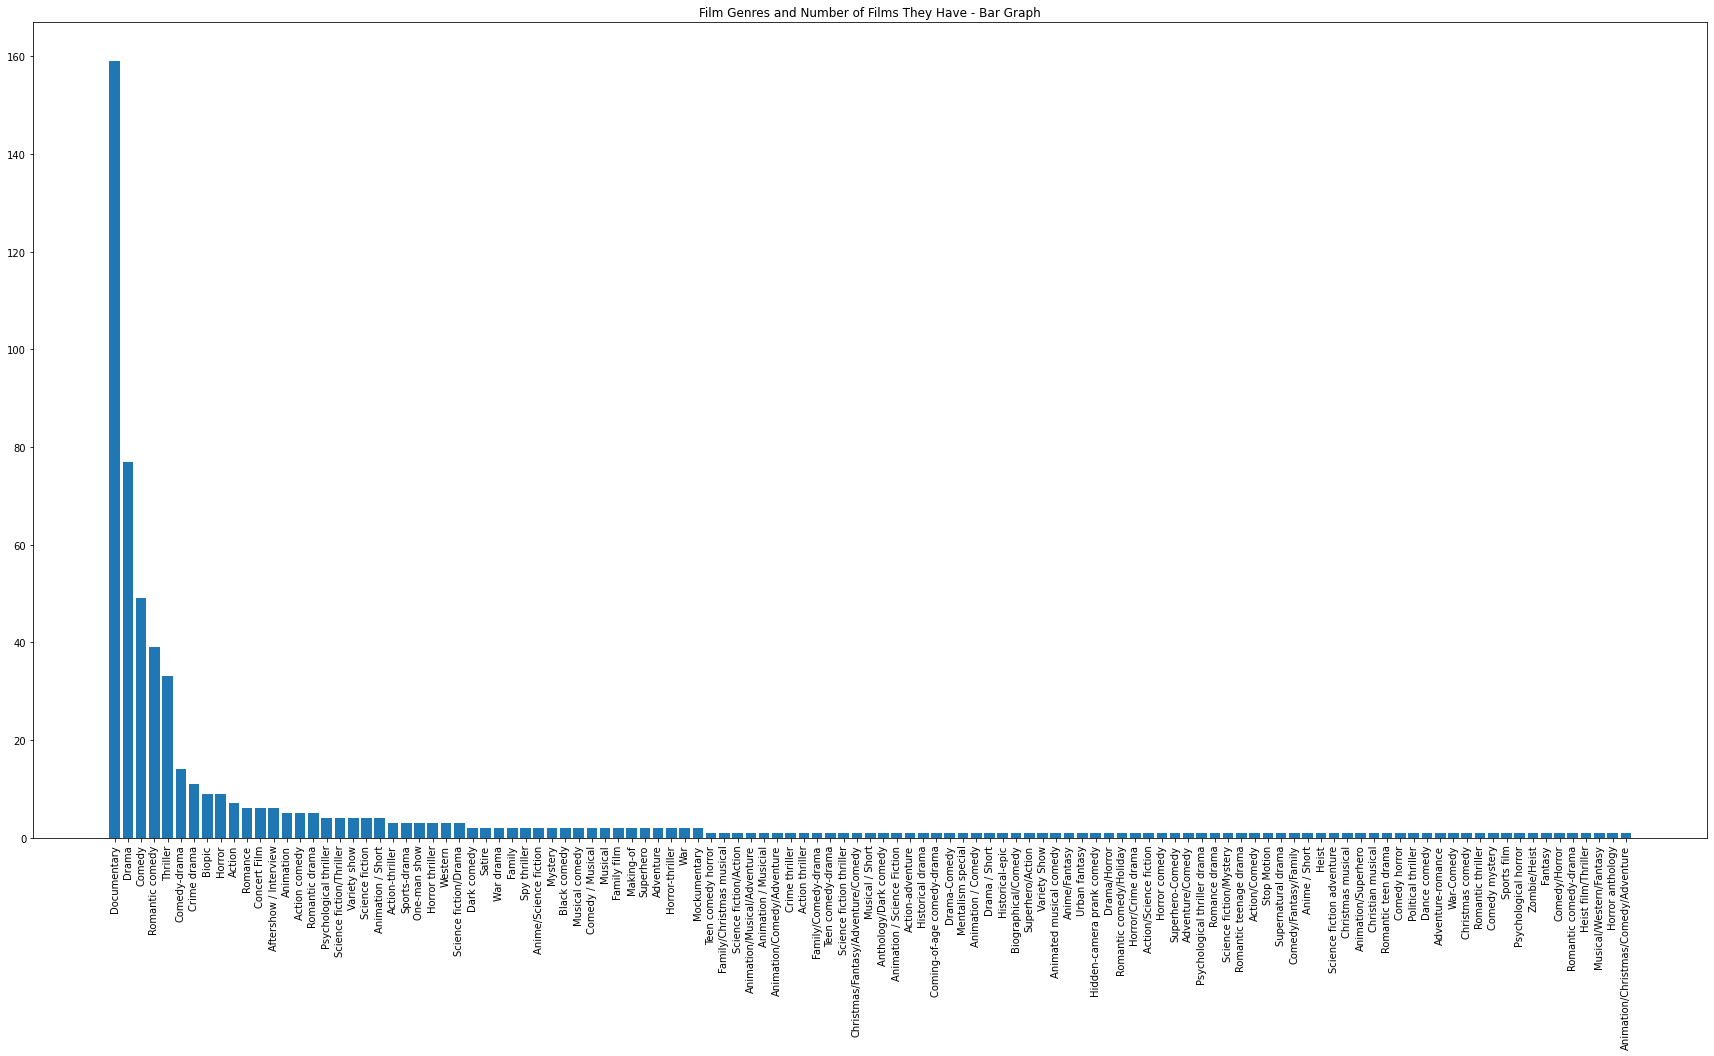

In [12]:
genre_dictionary = dict(netflix_dataframe["Genre"].value_counts())
fig = plt.figure(figsize=(30,15))
plt.bar(list(genre_dictionary.keys()), list(genre_dictionary.values()))
plt.title("Film Genres and Number of Films They Have - Bar Graph")
plt.xticks(rotation=90)
plt.show()

In [13]:
language_dictionary = dict(netflix_dataframe["Language"].value_counts())

sorted_value_index = np.argsort(language_dictionary.values())
dictionary_keys = list(language_dictionary.keys())
sorted_language_dictionary = {dictionary_keys[i]: sorted(
    language_dictionary.values())[i] for i in range(len(dictionary_keys))}

print(language_dictionary, "not sorted")
print(sorted_language_dictionary, "sorted")
count = 0
print("Most talking languages in Netflix films:")
for i in list(sorted_language_dictionary.keys()):
    count += 1
    if count >= len(list(sorted_language_dictionary.keys()))-2:
        print(i, sorted_language_dictionary[i])

{'English': 401, 'Hindi': 33, 'Spanish': 31, 'French': 20, 'Italian': 14, 'Portuguese': 12, 'Indonesian': 9, 'Japanese': 6, 'Korean': 6, 'German': 5, 'Turkish': 5, 'English/Spanish': 5, 'Polish': 3, 'Dutch': 3, 'Marathi': 3, 'English/Hindi': 2, 'Thai': 2, 'English/Mandarin': 2, 'English/Japanese': 2, 'Filipino': 2, 'English/Russian': 1, 'Bengali': 1, 'English/Arabic': 1, 'English/Korean': 1, 'Spanish/English': 1, 'Tamil': 1, 'English/Akan': 1, 'Khmer/English/French': 1, 'Swedish': 1, 'Georgian': 1, 'Thia/English': 1, 'English/Taiwanese/Mandarin': 1, 'English/Swedish': 1, 'Spanish/Catalan': 1, 'Spanish/Basque': 1, 'Norwegian': 1, 'Malay': 1, 'English/Ukranian/Russian': 1} not sorted
{'English': 1, 'Hindi': 1, 'Spanish': 1, 'French': 1, 'Italian': 1, 'Portuguese': 1, 'Indonesian': 1, 'Japanese': 1, 'Korean': 1, 'German': 1, 'Turkish': 1, 'English/Spanish': 1, 'Polish': 1, 'Dutch': 1, 'Marathi': 1, 'English/Hindi': 1, 'Thai': 1, 'English/Mandarin': 1, 'English/Japanese': 2, 'Filipino': 2,

In [14]:
highest_IMDB_dataframe = netflix_dataframe.sort_values("IMDB Score", axis=0, ascending=False)
print("Highest IMDB Score Films")
highest_IMDB_dataframe["Title"].head(10)

Highest IMDB Score Films


583       David Attenborough: A Life on Our Planet
582      Emicida: AmarElo - It's All For Yesterday
581                        Springsteen on Broadway
580    Winter on Fire: Ukraine's Fight for Freedom
579          Taylor Swift: Reputation Stadium Tour
578     Ben Platt: Live from Radio City Music Hall
577                         Dancing with the Birds
576                        Cuba and the Cameraman 
573                                          Klaus
571                                           13th
Name: Title, dtype: object

In [15]:
print(f"The correlation between IMDB Score and Runtime is {netflix_dataframe['IMDB Score'].corr(netflix_dataframe['Runtime'])}")
print("There is so small correlation between them that we can neglect it.")

The correlation between IMDB Score and Runtime is -0.04089629142078871
There is so small correlation between them that we can neglect it.


Top 10 Highest IMDB Scores by Genres
Animation/Christmas/Comedy/Adventure 8.20
Musical / Short 7.70
Concert Film 7.63
Anthology/Dark comedy 7.60
Animation / Science Fiction 7.50
Making-of 7.45
Action-adventure 7.30
Drama-Comedy 7.20
One-man show 7.13
Animation / Short 7.12



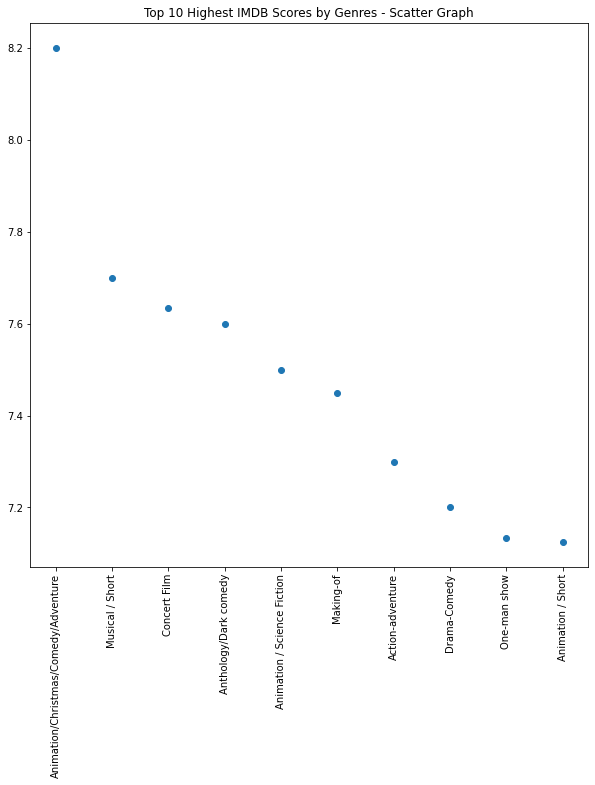

In [16]:
genres_list = list(dict(netflix_dataframe["Genre"].value_counts()).keys())
mean_list = []
for i in genres_list:
    mean_list.append(netflix_dataframe[netflix_dataframe["Genre"]==i]["IMDB Score"].mean())
highest_genre_score_dictionary = dict(zip(mean_list, genres_list))
highest_genre_score_dictionary = OrderedDict(sorted(highest_genre_score_dictionary.items(), reverse=True))
count = 0
highest_genres_list = []
highest_scores_list = []
print("Top 10 Highest IMDB Scores by Genres")
for i in highest_genre_score_dictionary:
    count += 1
    if count <= 10:
        highest_genres_list.append(highest_genre_score_dictionary[i])
        highest_scores_list.append(i)
        print(f"{highest_genre_score_dictionary[i]} {i:.2f}")
    else:
        break
print()
fig = plt.figure(figsize=(10,10))
plt.scatter(highest_genres_list, highest_scores_list)
plt.title("Top 10 Highest IMDB Scores by Genres - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

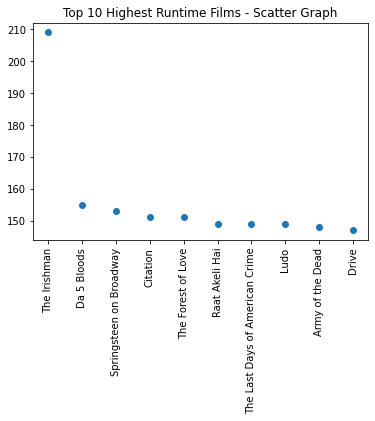

In [17]:
highest_runtime_dataframe = netflix_dataframe.sort_values("Runtime", axis=0, ascending=False)
#fig = plt.figure(figsize=(7,3))
plt.scatter(highest_runtime_dataframe["Title"][:10], highest_runtime_dataframe["Runtime"][:10])
plt.title("Top 10 Highest Runtime Films - Scatter Graph")
plt.xticks(rotation=90)
plt.show()


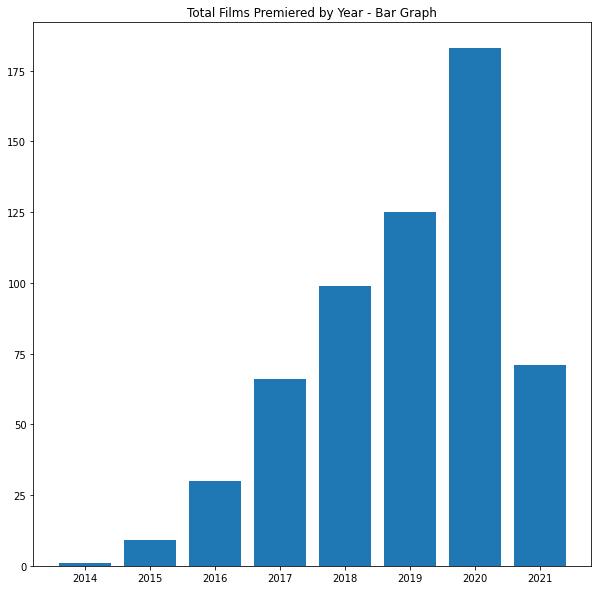

Highest Number of Films made in 2020 with 183 films


In [18]:
highest_film_year_dictionary = dict(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.value_counts())
highest_film_year_dictionary
fig = plt.figure(figsize=(10,10))
plt.bar(list(highest_film_year_dictionary.keys()), list(highest_film_year_dictionary.values()))
plt.title("Total Films Premiered by Year - Bar Graph")
plt.show()
highest_year_index = list(highest_film_year_dictionary.values()).index(max(highest_film_year_dictionary.values()))
highest_year_index = list(highest_film_year_dictionary.keys())[highest_year_index]
print(f"Highest Number of Films made in {highest_year_index} with {max(highest_film_year_dictionary.values())} films")

Lowest Average IMDB Score by Language is Malay with 4.2 



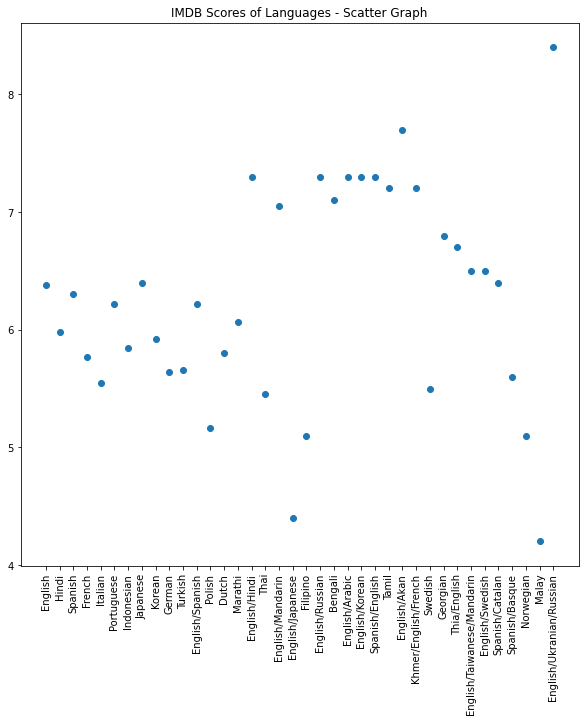

In [19]:
language_list = list(netflix_dataframe["Language"].value_counts().keys())
mean_list = []
for i in language_list:
    mean_list.append(netflix_dataframe[netflix_dataframe["Language"]==i]["IMDB Score"].mean())
print(f"Lowest Average IMDB Score by Language is {language_list[mean_list.index(min(mean_list))]} with {min(mean_list)} \n")
fig = plt.figure(figsize=(10,10))
plt.scatter(language_list, mean_list)
plt.title("IMDB Scores of Languages - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

In [20]:
year_dictionary = list(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.value_counts().keys())
total_runtime_list = []
for i in year_dictionary:
    total_runtime_list.append(netflix_dataframe[pd.DatetimeIndex(netflix_dataframe["Premiere"]).year == i]["Runtime"].sum())
print(f"Maximum Total Runtime is {max(total_runtime_list)} in {year_dictionary[total_runtime_list.index(max(total_runtime_list))]}")

Maximum Total Runtime is 17384 in 2020


In [21]:
language_list = list(netflix_dataframe["Language"].value_counts().keys())
highest_language_used_by_genre_dictionary = {}
for i in language_list:
    temp = netflix_dataframe[netflix_dataframe["Language"] == i]["Genre"].value_counts()
    highest_number_temp = max(temp)
    temp1 = list(temp).index(highest_number_temp)
    temp2 = list(temp.keys())
    highest_genre_temp = temp2[temp1]
    highest_language_used_by_genre_dictionary[i] = [highest_genre_temp, highest_number_temp]

for j,k in zip(highest_language_used_by_genre_dictionary.keys(), highest_language_used_by_genre_dictionary.values()):
    print(f"In {j}, most used genre is {k[0]} with  {k[1]}")


In English, most used genre is Documentary with  120
In Hindi, most used genre is Drama with  13
In Spanish, most used genre is Documentary with  8
In French, most used genre is Documentary with  6
In Italian, most used genre is Drama with  4
In Portuguese, most used genre is Comedy with  6
In Indonesian, most used genre is Drama with  3
In Japanese, most used genre is Anime/Science fiction with  2
In Korean, most used genre is Drama with  2
In German, most used genre is Thriller with  1
In Turkish, most used genre is Comedy with  2
In English/Spanish, most used genre is Documentary with  5
In Polish, most used genre is Horror with  1
In Dutch, most used genre is Romantic comedy with  1
In Marathi, most used genre is Drama with  2
In English/Hindi, most used genre is Documentary with  2
In Thai, most used genre is Horror with  1
In English/Mandarin, most used genre is Documentary with  2
In English/Japanese, most used genre is Documentary with  1
In Filipino, most used genre is Drama w

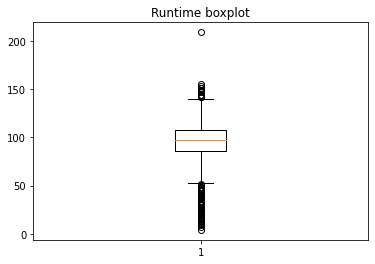

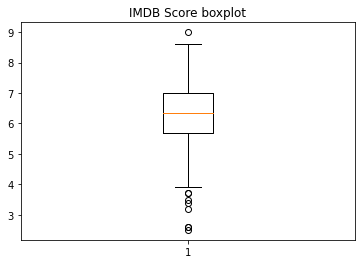

In [22]:
plt.boxplot(netflix_dataframe["Runtime"])
plt.title("Runtime boxplot")
plt.show()
plt.boxplot(netflix_dataframe["IMDB Score"])
plt.title("IMDB Score boxplot")
plt.show()

Runtime ve IMDB Score'larında azda olsa outlierlar bulunmaktadır. Bunların görülmesi normal çünkü çok az film 8 üstü ve 4'ün altında alırken yoğunluklu olarak 6 ile 7 arasında IMDB score'u almıştır filmler. Bu da Netflixdeki filmlerin genel kullanıcıya hitap ettiği ve ortalama yapıldığı görülmektedir. 
Runtime'a bakıldığında ise sadece üst limitte bir outlier'ın olduğu görülmektedir. Verisetinin alındığı yılda çıkan The Irishman sinema tarihinin en uzun filmlerinden biri olmasından dolayı burda karşımıza outlier olarak çıkmaktadır. Alt limite bakıldığında ise 50 dakikanın altında bolca nokta görülmekte bunlar kısa çekilen kamera arkası filmler, belgeseller veya röportajlar olabilir.